# Project Overview

This dataset provides measurements of the geometrical properties of kernels belonging to three different varieties of the wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes. Original dataset is available at UCI Machine Learning Repository Seed dataset.

 this is unsupervised learning project, the target class is not available in such learning. we can ignore the target class or use it for just to re-check what the algorithm is clustering.

## Varieties of the wheat seed dataset

##### The required llibrairies are imported as below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

##### Let's read the datafile Seed_Data.csv and show the head of the file

In [2]:
df = pd.read_csv('Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


##### Let's check how many entries we have in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


##### Let's display the basic statistic

In [4]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


---

## Exploratory Data Analysis

Let's see how the area 'A' relatedd to the compactness 'C', and create a scatter plot.

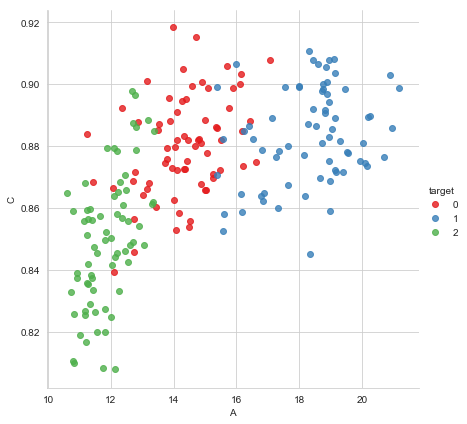

In [7]:
sns.lmplot(x='A', y='C', data=df, hue='target',
          palette='Set1', height=6, aspect=1, fit_reg=False)
plt.show()


##### Let's see how area 'A' is related to A_Coef using scatter plot.

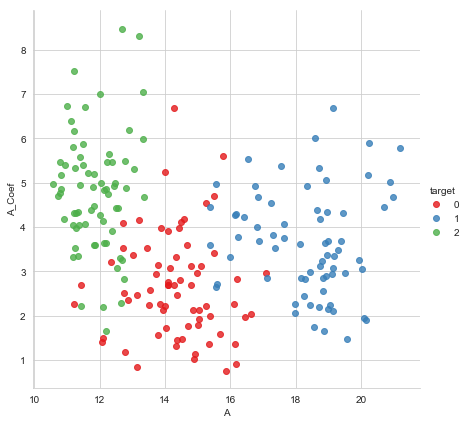

In [10]:
sns.lmplot(x='A', y='A_Coef', data=df, hue='target',
          palette='Set1', height=6, aspect=1, fit_reg = False)
plt.show()

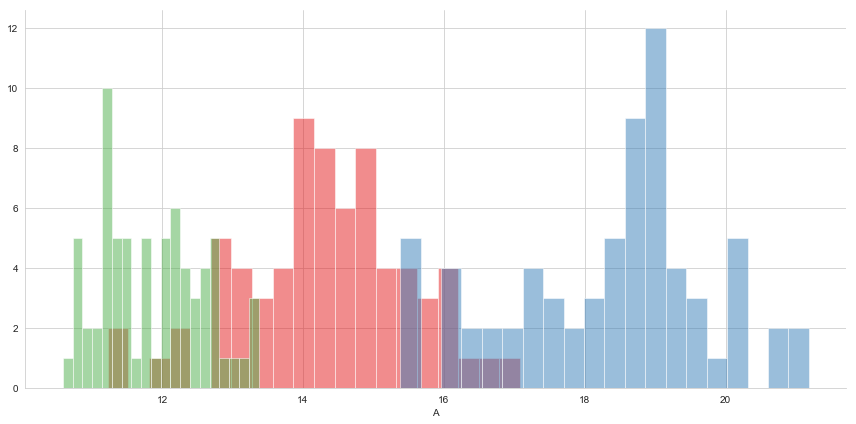

In [11]:
g = sns.FacetGrid(data=df, hue = 'target', palette = 'Set1', height = 6, aspect = 2)
g = g.map(plt.hist,'A', bins=20, alpha=0.5)

plt.show()

---

## KMEANS CLUSTERING

Machine learning using KMEANS clustering unsupervised algorithm

##### Let's import KMeans from Scikit-learn and create an instance of KMeans model with 3 clusters.

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

##### Let's fit the model to all data except for the 'target'

In [14]:
kmeans.fit(df.drop('target',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

##### Let's figure out how to get the cluster center vectors, and pass them to 'centers', then the ouput. 

In [15]:
centers = kmeans.cluster_centers_
centers

array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

##### now that we have the fitted model, let's get the labels for kmean and create a new column 'klabels' in our dataframe, and let's check the head of our dataframe 

In [16]:
df['klabels'] = kmeans.labels_
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2


##### Let's create a plot 

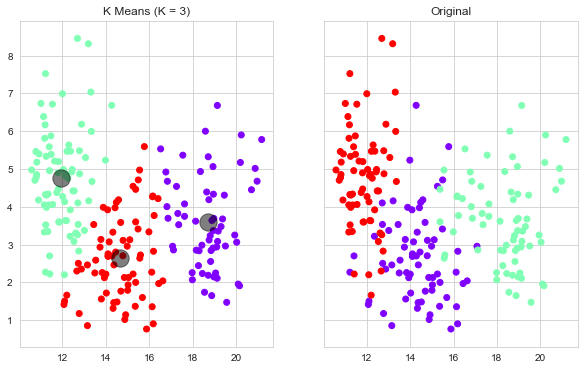

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 3)')
ax1.scatter(x = df['A'], y = df['A_Coef'], 
            c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 5],
            c='black', s =300, alpha=0.5)

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['A'], y = df['A_Coef'], 
            c = df['target'], cmap='rainbow')

plt.show()

## Elbow point

##### Let's etimate the Elbow point to see our selection for K was right.

In [23]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}
# Let's test for K from 1 to 10, we can use range() function here! remember?
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df.drop('target',axis=1))
    # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
    sum_square[k] = kmeans.inertia_ 

##### Let's generate a Elbow plot 

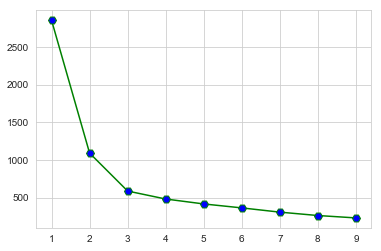

In [25]:
plt.plot(list(sum_square.keys()),
         list(sum_square.values()),
        linestyle = '-',
        marker = 'H',
        color = 'g',
        markersize = 8,
        markerfacecolor ='b')

plt.show()